# Data Preprocessing

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [2]:
train, test = tf.keras.datasets.mnist.load_data()

In [3]:
(x_train, y_train) = train

In [4]:
(x_test, y_test) = test

### Visualization

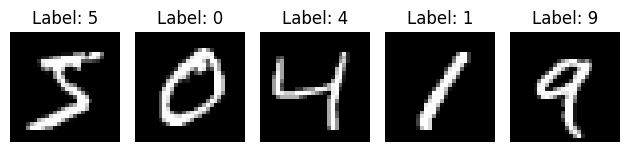

In [5]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap = 'grey')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Normalize the Pixel Values (0, 255) -> (0, 1)

###### Neural Networks work better with input values in the range (0, 1)

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Flatten the Input Images

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_train.shape

(60000, 784)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_test = x_test.reshape(x_test.shape[0], -1)
x_test.shape

(10000, 784)

### One-hot Encode the Labels

###### Label 3 would be encoded as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [11]:
y_train.shape

(60000,)

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_train.shape

(60000, 10)

In [13]:
y_test.shape

(10000,)

In [14]:
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_test.shape

(10000, 10)

# Building the ANN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Define the Model

In [16]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784, )),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.summary()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [17]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'Precision']
)

In [18]:
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - Precision: 0.9236 - accuracy: 0.8098 - loss: 0.6077 - val_Precision: 0.9610 - val_accuracy: 0.9543 - val_loss: 0.1560
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - Precision: 0.9679 - accuracy: 0.9611 - loss: 0.1301 - val_Precision: 0.9710 - val_accuracy: 0.9655 - val_loss: 0.1182
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - Precision: 0.9784 - accuracy: 0.9747 - loss: 0.0841 - val_Precision: 0.9695 - val_accuracy: 0.9660 - val_loss: 0.1183
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - Precision: 0.9831 - accuracy: 0.9806 - loss: 0.0634 - val_Precision: 0.9748 - val_accuracy: 0.9712 - val_loss: 0.1013
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - Precision: 0.9861 - accuracy: 0.9839 - loss: 0.0490 - val_Precision: 0.9755 - val_accuracy: 0.9732 - val_loss: 0.0971
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - Precision: 0.9888 - accuracy: 0.9871 - loss: 0.0405 - val_Precision:

# Analyze Training Performance

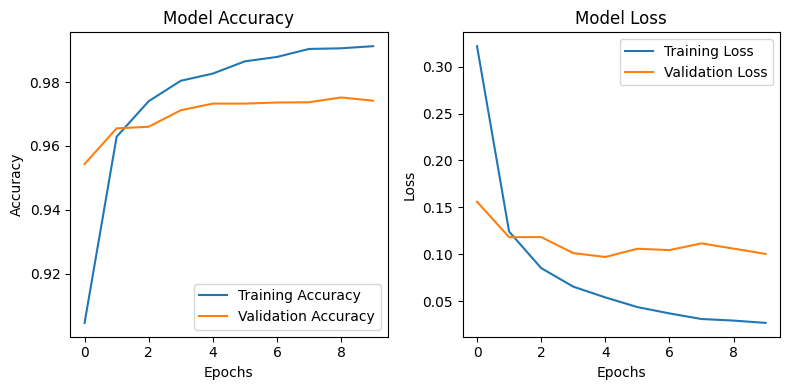

In [19]:
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation on Test Data

In [20]:
test_loss, test_accuracy, test_precision = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.9744 - accuracy: 0.9728 - loss: 0.1155
Test Loss: 0.10016731172800064
Test Accuracy: 0.9758999943733215
Test Precision: 0.9770610332489014


In [21]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis = 1)
actual_classes = np.argmax(y_test, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [22]:
misclassified_indices = np.where(predicted_classes != actual_classes)[0]

print(f'Number of misclassified samples: {len(misclassified_indices)}')

Number of misclassified samples: 241


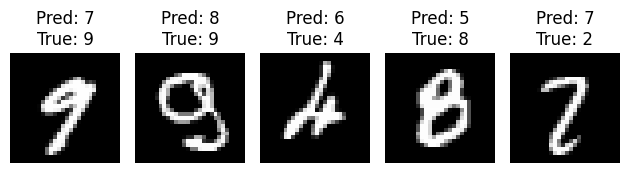

In [23]:
for i, index in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap = 'grey')
    plt.title(f'Pred: {predicted_classes[index]}\nTrue: {np.argmax(y_test[index])}')
    plt.axis('off')

plt.tight_layout()
plt.show()